In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
from scipy import stats
import arviz as az
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

## Exercise 1: Specifying distributions in code and sampling

### Part 1

Specify three distributions in `scipy`:

* A Binomial distribution of `p=.8` and `n=20`.
* A Poisson distribution with rate 10.
* A Normal distribution with mean 20 and standard deviation.

In [3]:
binomial = stats.binom(p=0.8, n=20)
poisson = stats.poisson(mu=10)
normal = stats.norm(loc=20, scale=20)

### Part 2

For the distributions in Exercise 1, take:

* 10 random samples.
* 30 random samples.
* 10,000 random samples.

Then:

* Calculate the mean of each sample. How closely does it approximate the true mean you would expect?
* Plot the samples. How to the plots differ?

In [4]:
num_samples = [10, 30, 10_000]

def draw_samples(dist, num_samples):
    return {f"{num} samples": dist.rvs(size=num) for num in num_samples}

binomial_samples = draw_samples(binomial, num_samples)
poisson_samples = draw_samples(poisson, num_samples)
normal_samples = draw_samples(normal, num_samples)

In [5]:
binomial_samples

{'10 samples': array([16, 15, 18, 13, 17, 17, 15, 14, 17, 13]),
 '30 samples': array([19, 18, 12, 15, 16, 14, 15, 17, 17, 16, 16, 12, 16, 18, 16, 15, 18,
        14, 17, 15, 18, 18, 18, 15, 16, 16, 13, 15, 17, 18]),
 '10000 samples': array([13, 20, 18, ..., 17, 14, 14])}

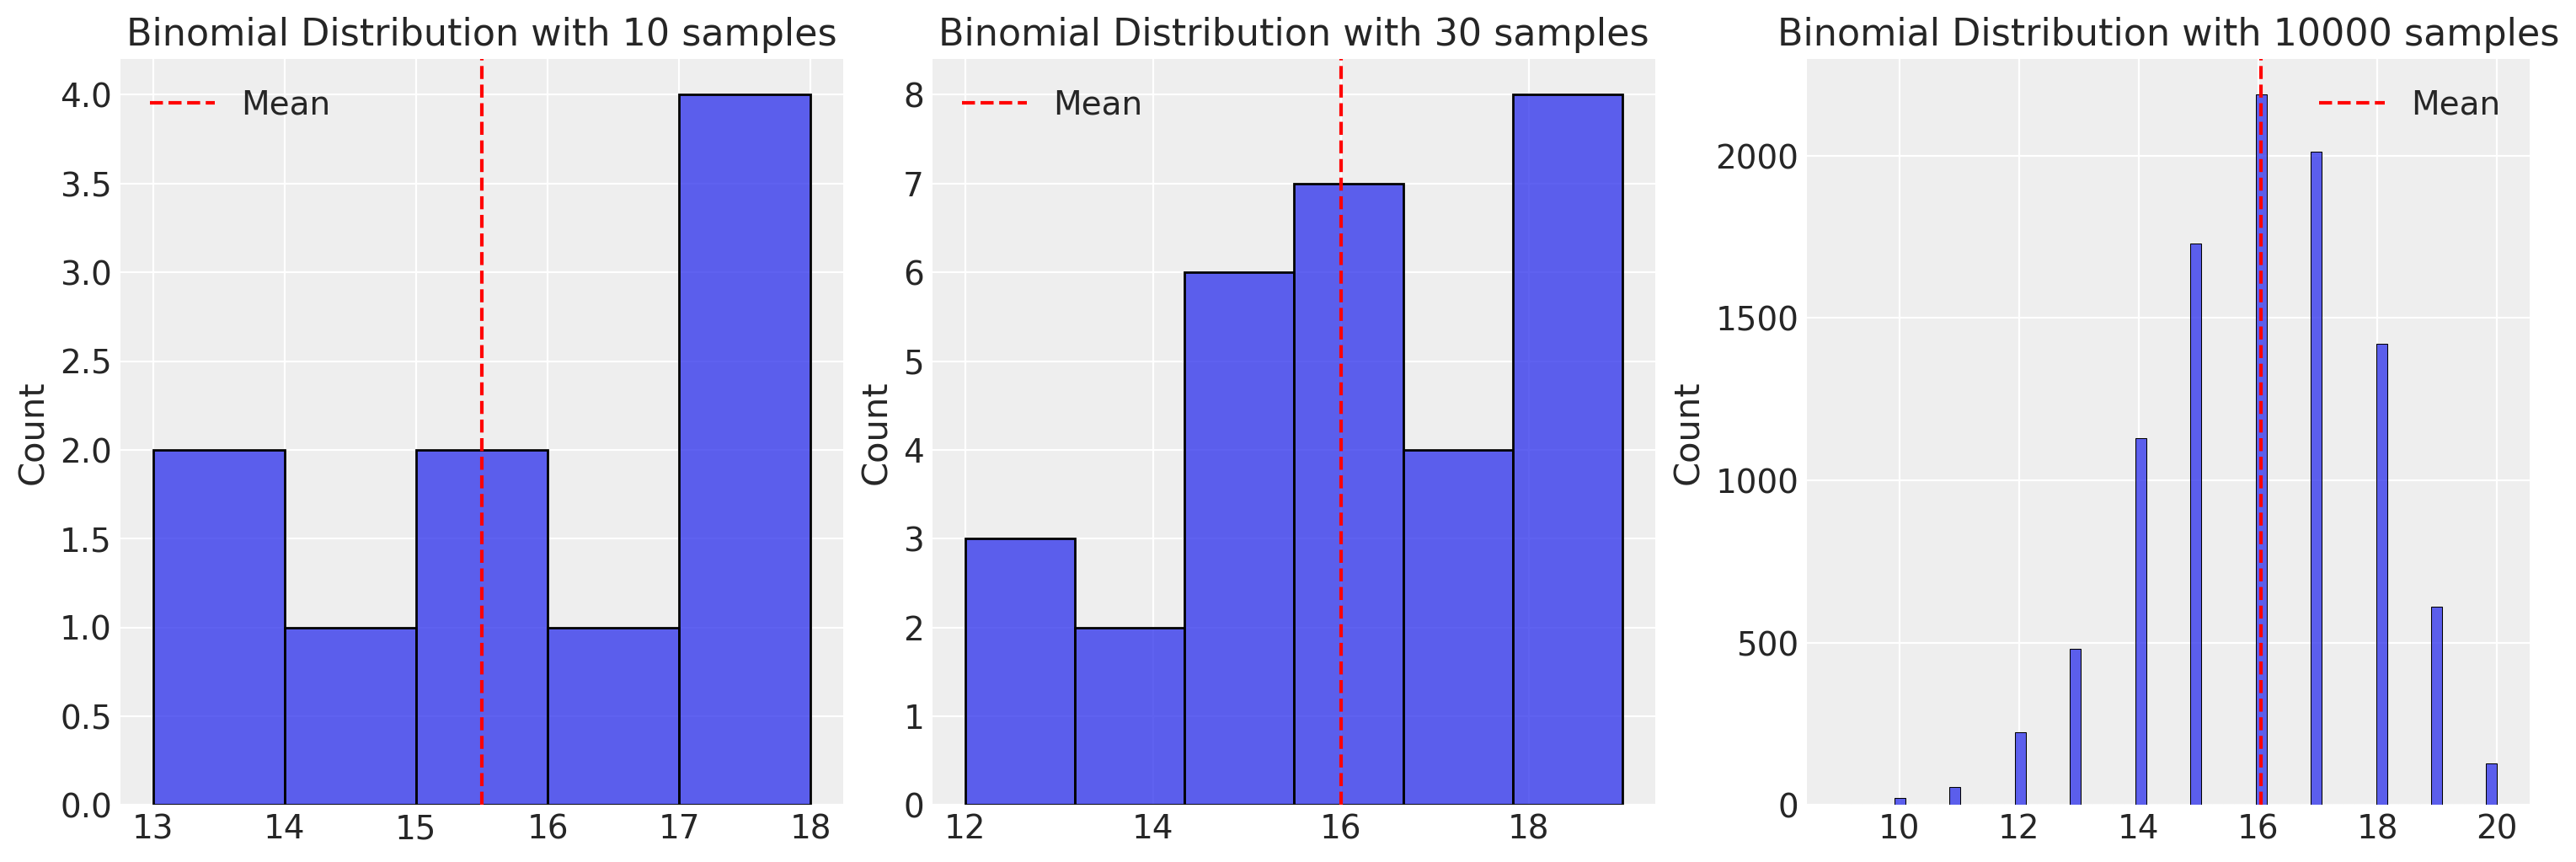

In [6]:
_, ax = plt.subplots(1, 3, figsize=(15, 5))

for index, (num_samples, samples) in enumerate(binomial_samples.items()):
    sns.histplot(samples, ax=ax[index])
    ax[index].set_title(f"Binomial Distribution with {num_samples}")
    ax[index].axvline(x=np.mean(samples), color="red", linestyle="--", label="Mean")
    ax[index].legend()

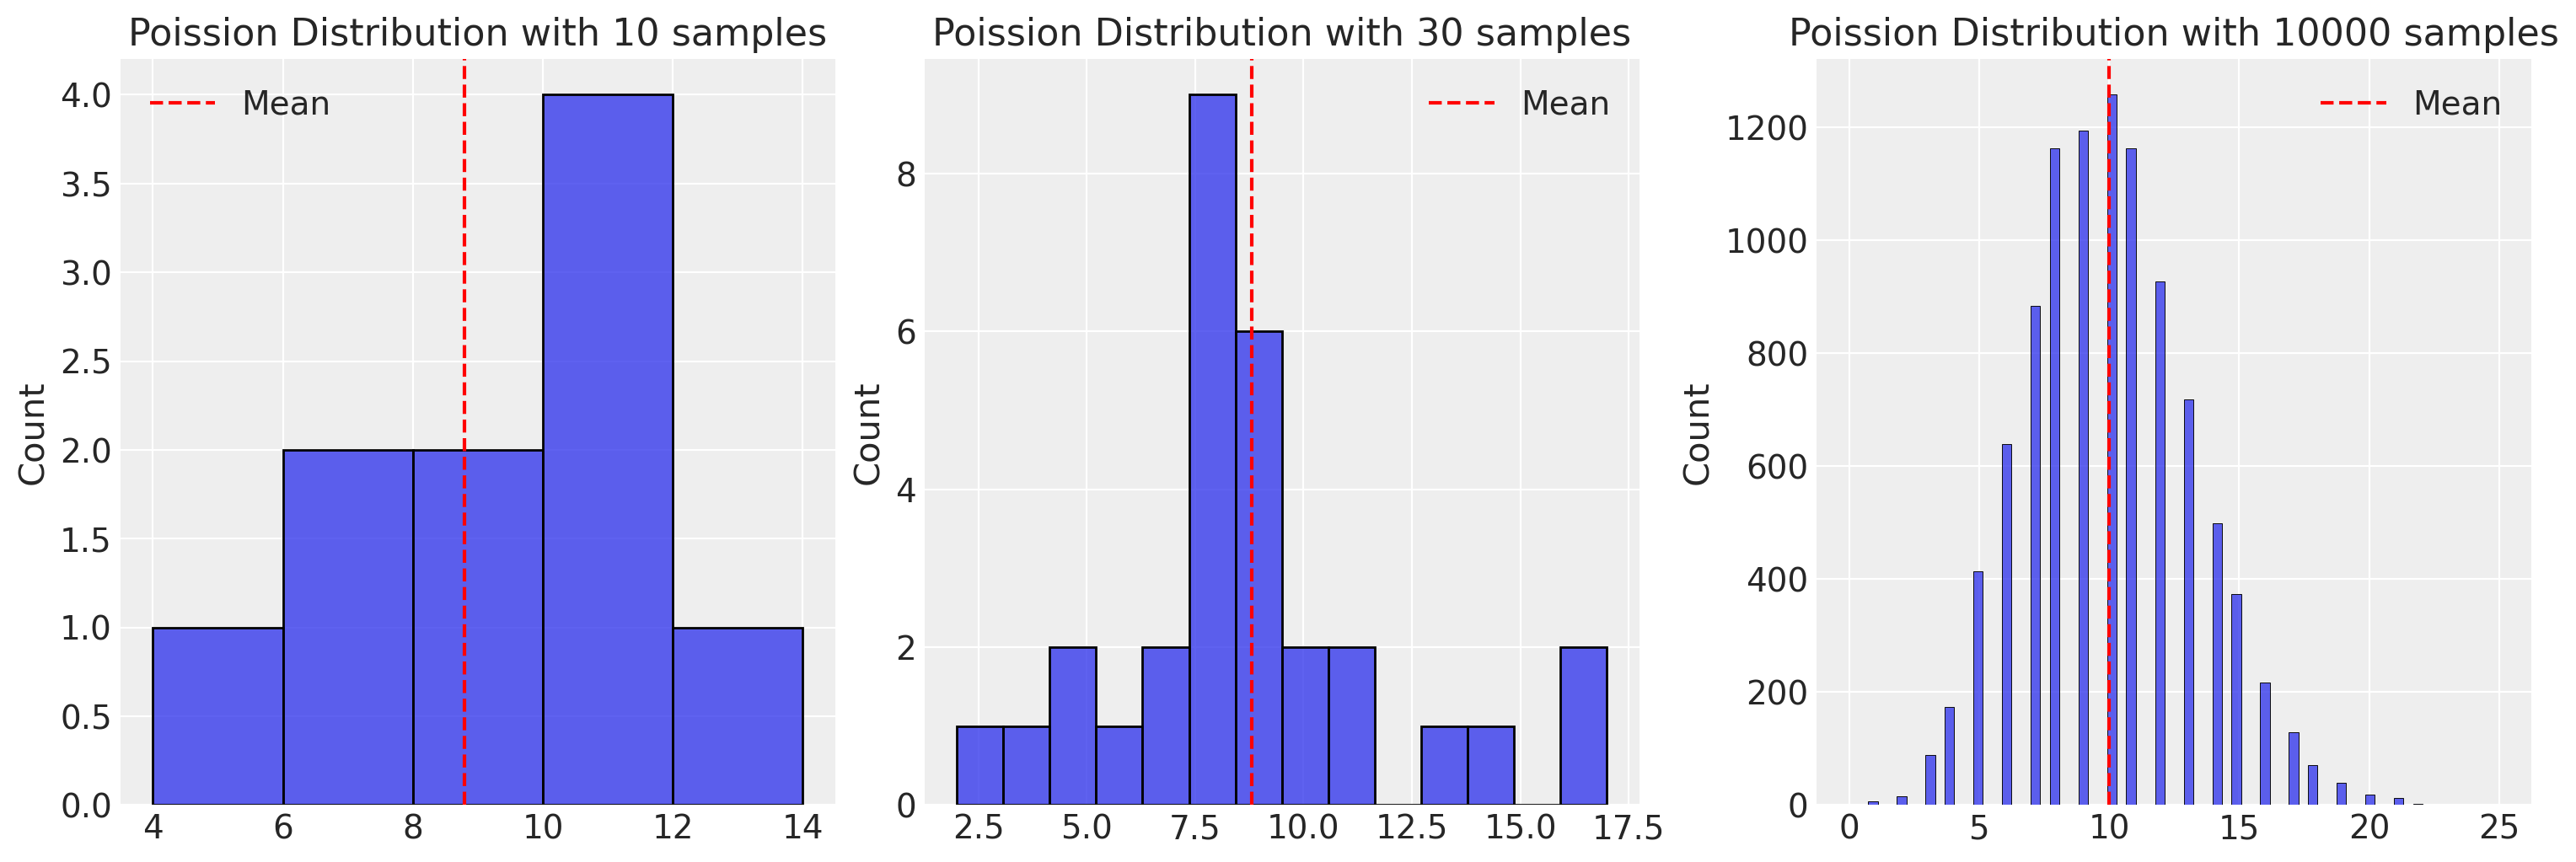

In [7]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for index, (num_samples, samples) in enumerate(poisson_samples.items()):
    sns.histplot(samples, ax=ax[index])
    ax[index].set_title(f"Poission Distribution with {num_samples}")
    ax[index].axvline(x=np.mean(samples), color="red", linestyle="--", label="Mean")
    ax[index].legend()

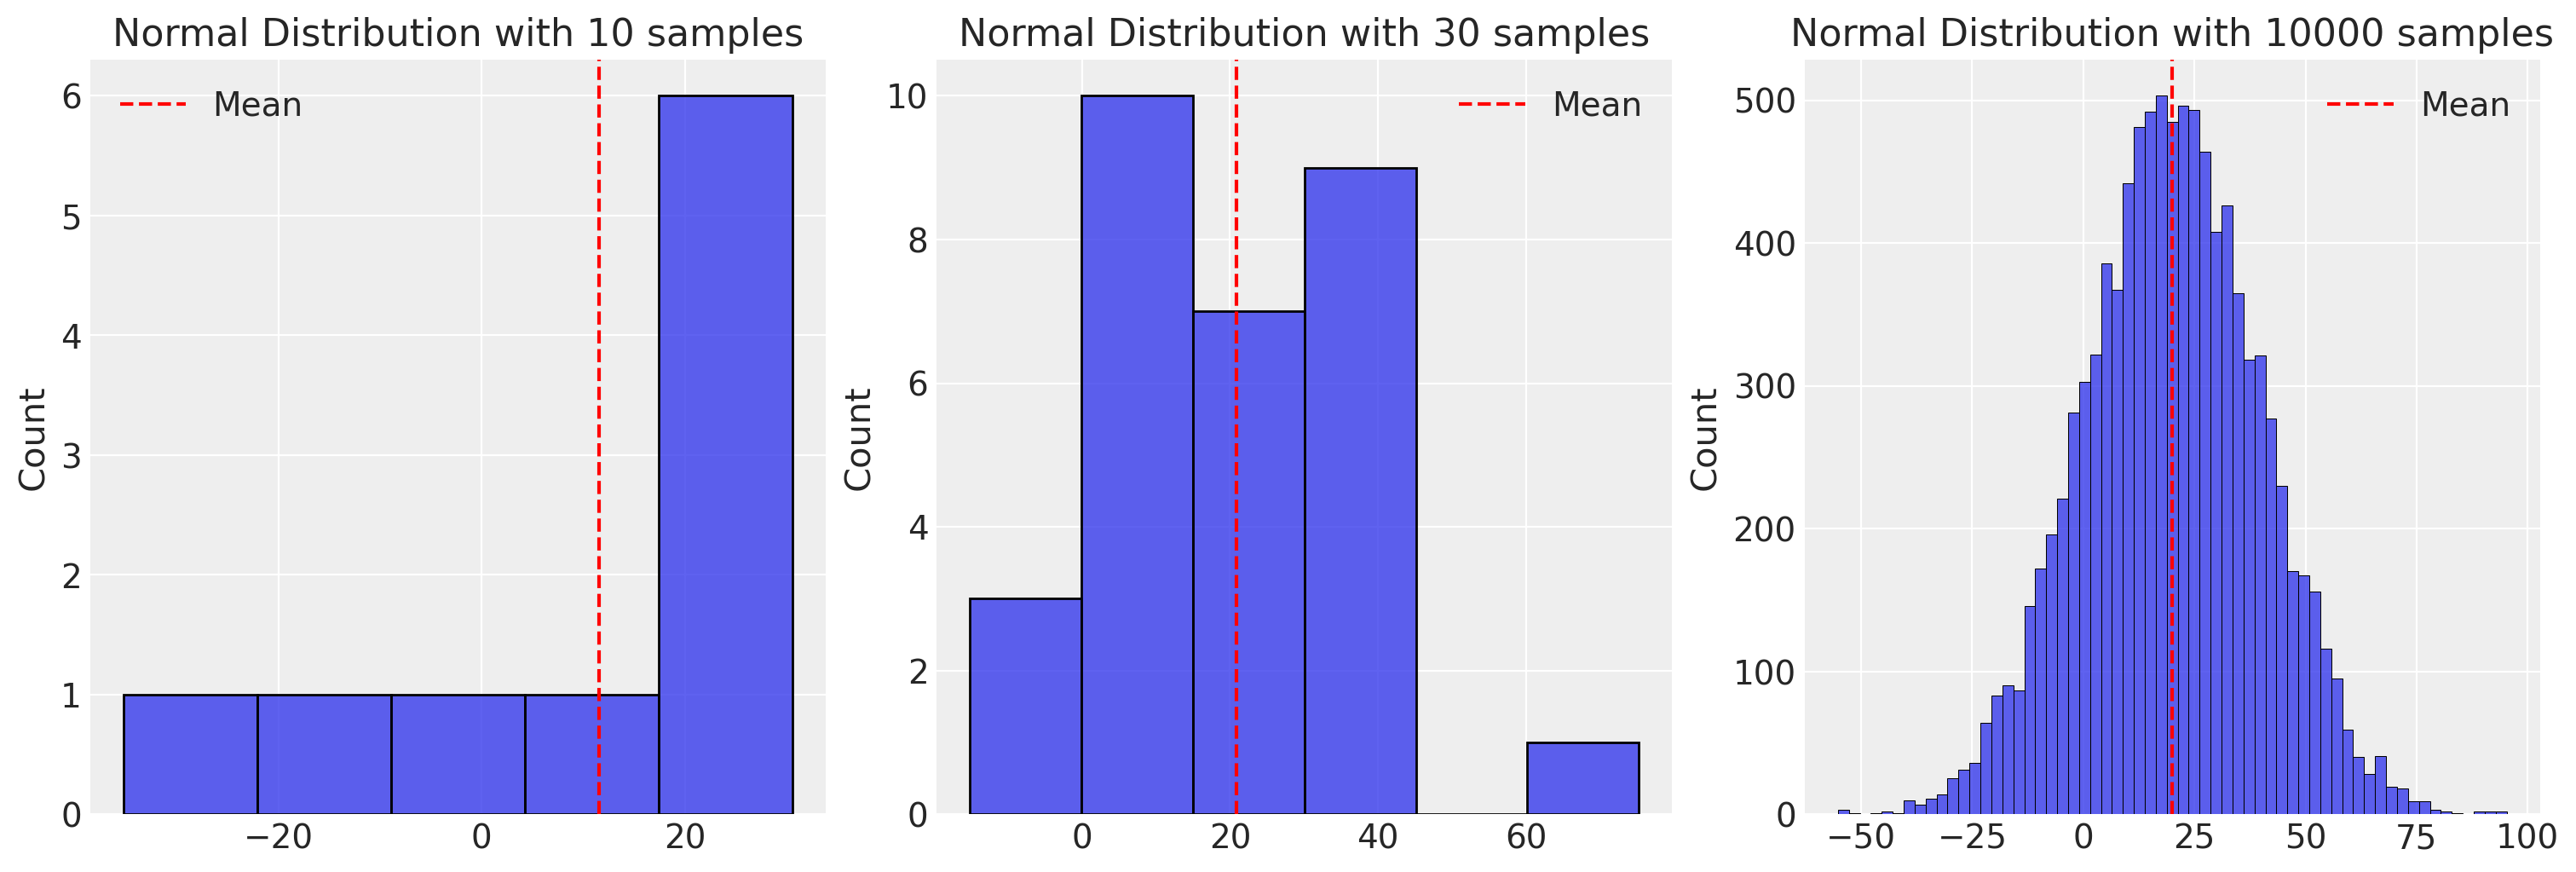

In [8]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for index, (num_samples, samples) in enumerate(normal_samples.items()):
    sns.histplot(samples, ax=ax[index])
    ax[index].set_title(f"Normal Distribution with {num_samples}")
    ax[index].axvline(x=np.mean(samples), color="red", linestyle="--", label="Mean")
    ax[index].legend()

Based on the plots, we see that as we increase the number of samples, the distribution approximates its "true" shape as well as coalesces to the "true" mean.

## Exercise 2: Calculate PMF and PDF

### Part 1

For just the Binomial distribution, calculate the probability mass value of `[4, 16, 20]` individually. Which value has the highest number? Does this match your intuition? 

Based on the output, 16 has the highest probability mass value, with 20 as the second highest and 4 as the lowest. This matches my intuition as `p` in our Binomial distribution is 0.8 and `16/20 = 0.8`.

In [9]:
binomial.pmf([4, 16, 20])

array([1.30056978e-08, 2.18199402e-01, 1.15292150e-02])

### Part 2

For the Normal distribution, calculate the PDF from -20 to 60 using the np.linspace function to generate the x values. Plot PDF generated. Overlay this plot with the histogram in Exercise 2. Do they match?

In [10]:
xs = np.linspace(-20, 60, 81)

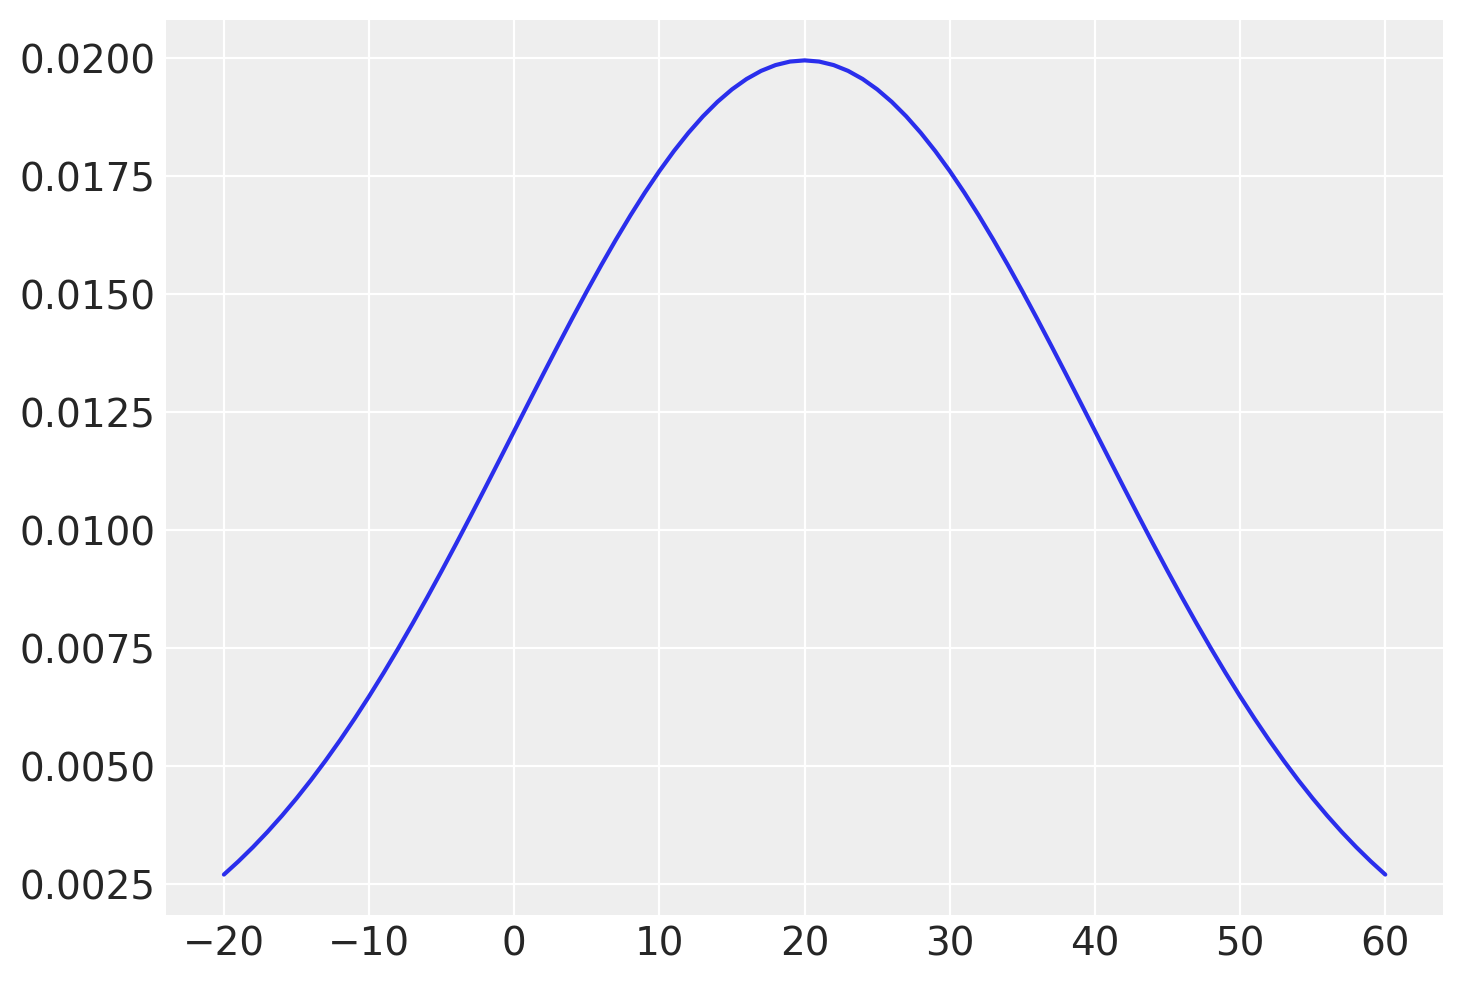

In [11]:
plt.plot(xs, normal.pdf(xs))

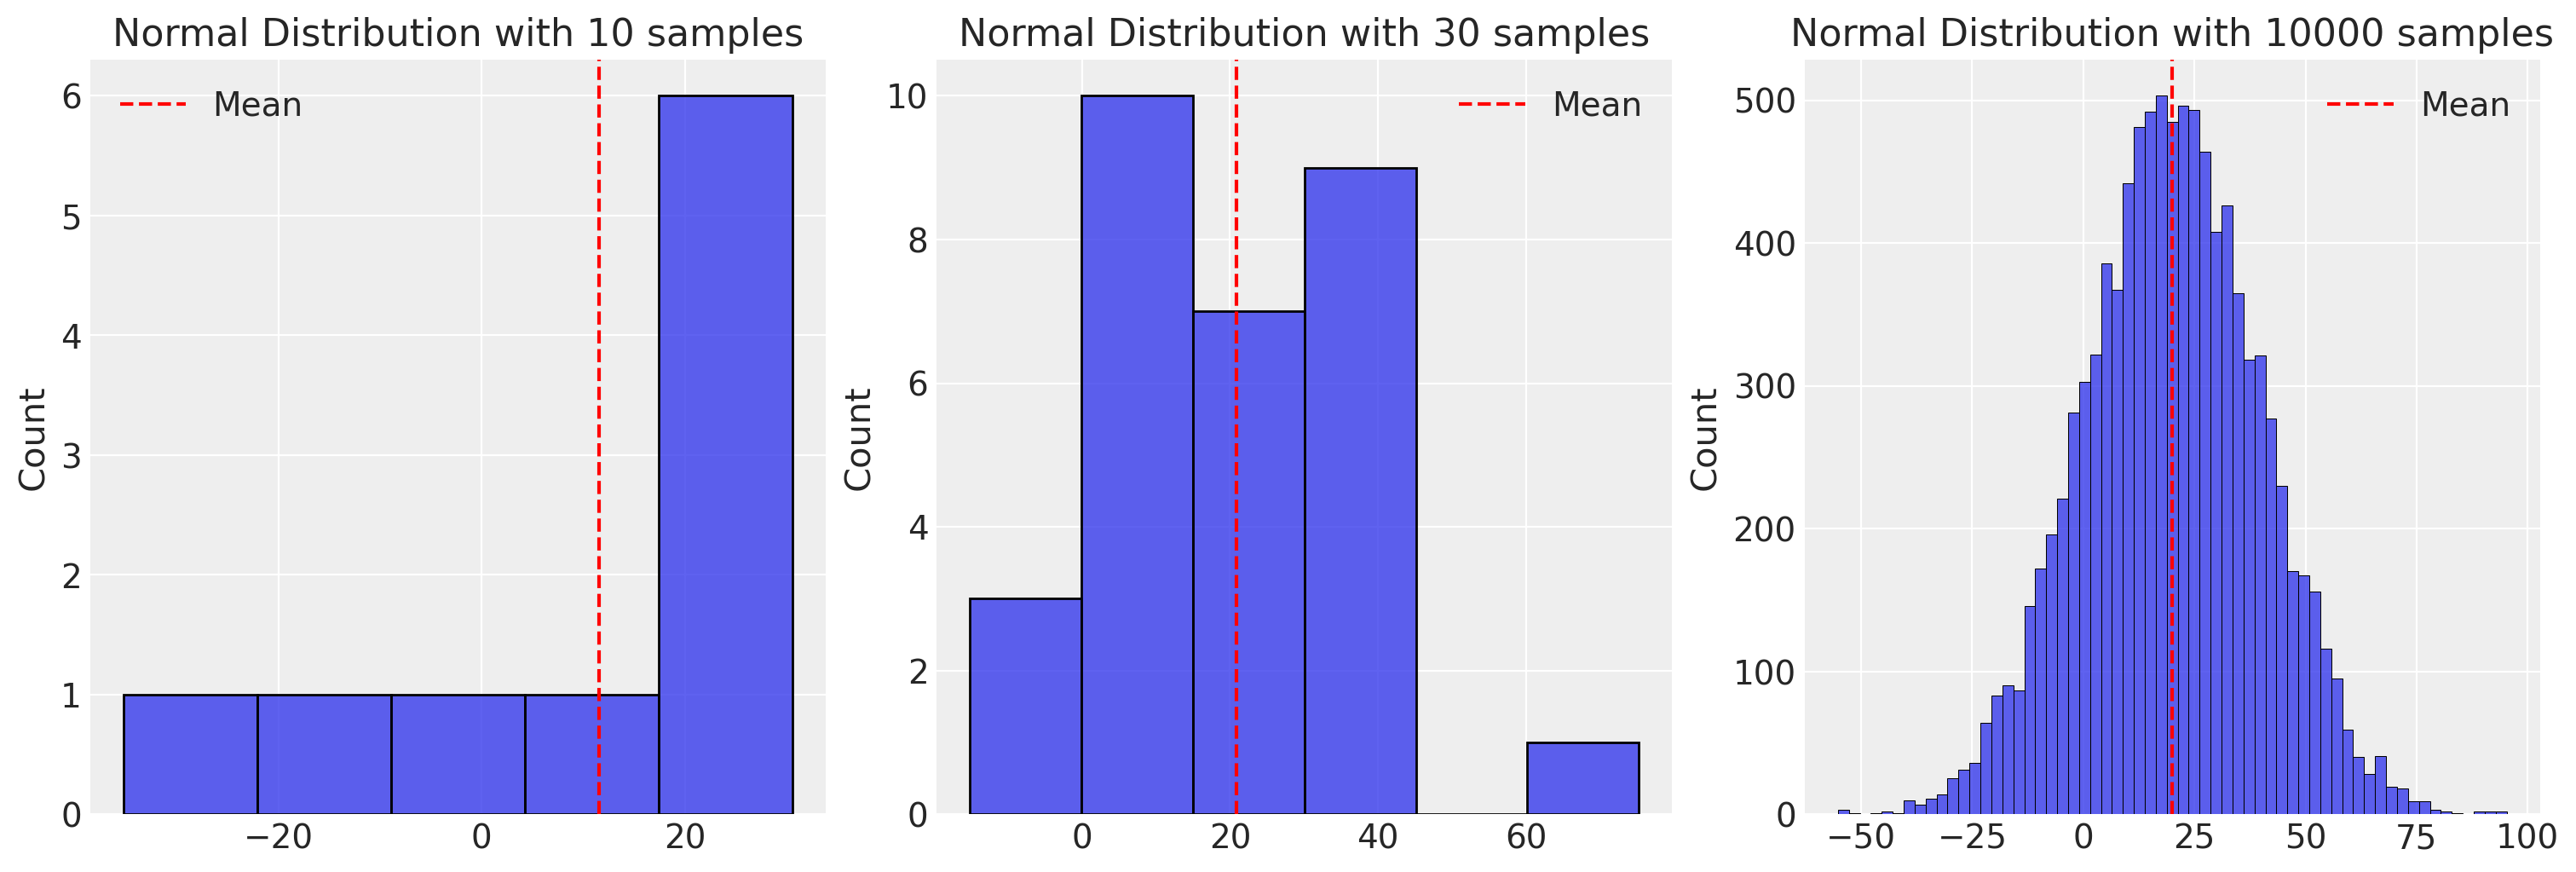

In [12]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for index, (num_samples, samples) in enumerate(normal_samples.items()):
    #ax[index].plot(xs, normal.pdf(xs), color="red")
    sns.histplot(samples, ax=ax[index])
    ax[index].set_title(f"Normal Distribution with {num_samples}")
    ax[index].axvline(x=np.mean(samples), color="red", linestyle="--", label="Mean")
    ax[index].legend()

## Exercise 3: Reading Docs

### Part 1

Go to the course references and find the `scipy` and `pymc` docs. Find the Poisson distribution in each. Is the parameterization the same?

It looks like it is. In `scipy`, `stats.poisson()` takes a rate parameter `mu` that is $\geq 0$. This is the same thing in `pm.Poisson()`, where `mu` is also a rate parameter with $\geq 0$.

### Part 2

Find two other distributions of the same name in both the `pymc` and `scipy` docs and compare the parameters. Do they match?

For `stats.norm()` in `scipy` `loc` corresponds to the mean and `scale` corresponds to the standard deviation. For `pm.Normal()`, `mu` corresponds to the mean and `sigma` corresponds to the standard deviation. While both formulations look the same, in `pm.Normal()`, we can specify `tau` instead of `sigma`, which parameterizes the normal in terms of precision instead of standard deviation.

## Exercise 4: Connecting the two spaces

### Part 1

### Part 2

Let's say we sample the heights of people and we observe a Normal distrbution in centimeters.

1. Specify a Normal distribution with 150 cm as the mean and 20 cm `N(150, 20)` as the standard deviation. Take 10,000 samples and plot the observed values.

2. Specify a normal distribution but this time
    * The mean is specified by another Normal distribution of `N(150, 5)`.
    * The standard deviation is 20 cm

Take 10,000 samples and plot both distributions. Label which one is the parameter distribution and which one is the observed distribution. *Hint: You may run into shape issues*

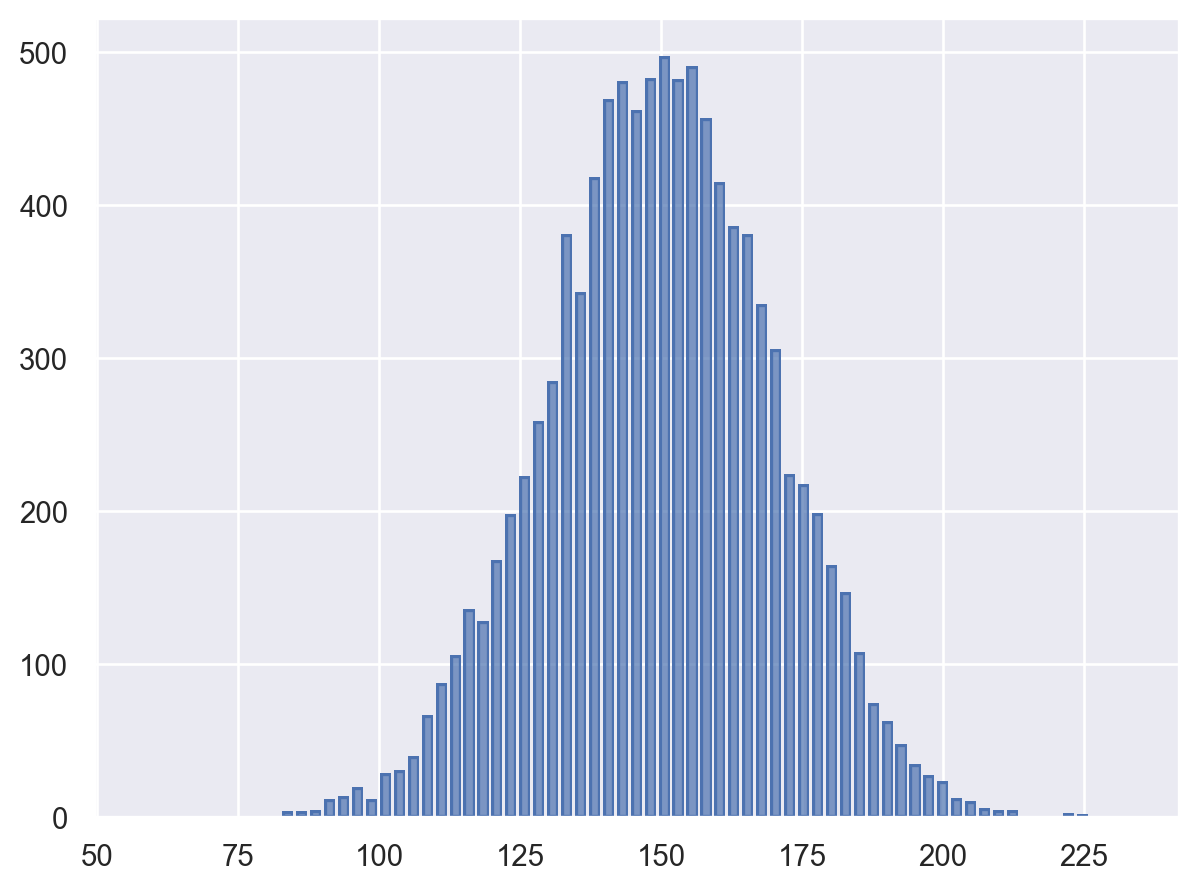

In [14]:
normal_150_20 = stats.norm(loc=150, scale=20).rvs(10_000)
(
    so.Plot(normal_150_20)
    .add(so.Bar(), so.Hist())
)

Here, `mu_prior` is our parameter distribution (i.e. our prior for the mean of height), while heights is our observed distribution (i.e. the prior predictive distribution).

In [15]:
mu_prior = stats.norm(loc=150, scale=5).rvs(10_000)
heights = stats.norm(loc=mu_prior, scale=20).rvs(10_000)

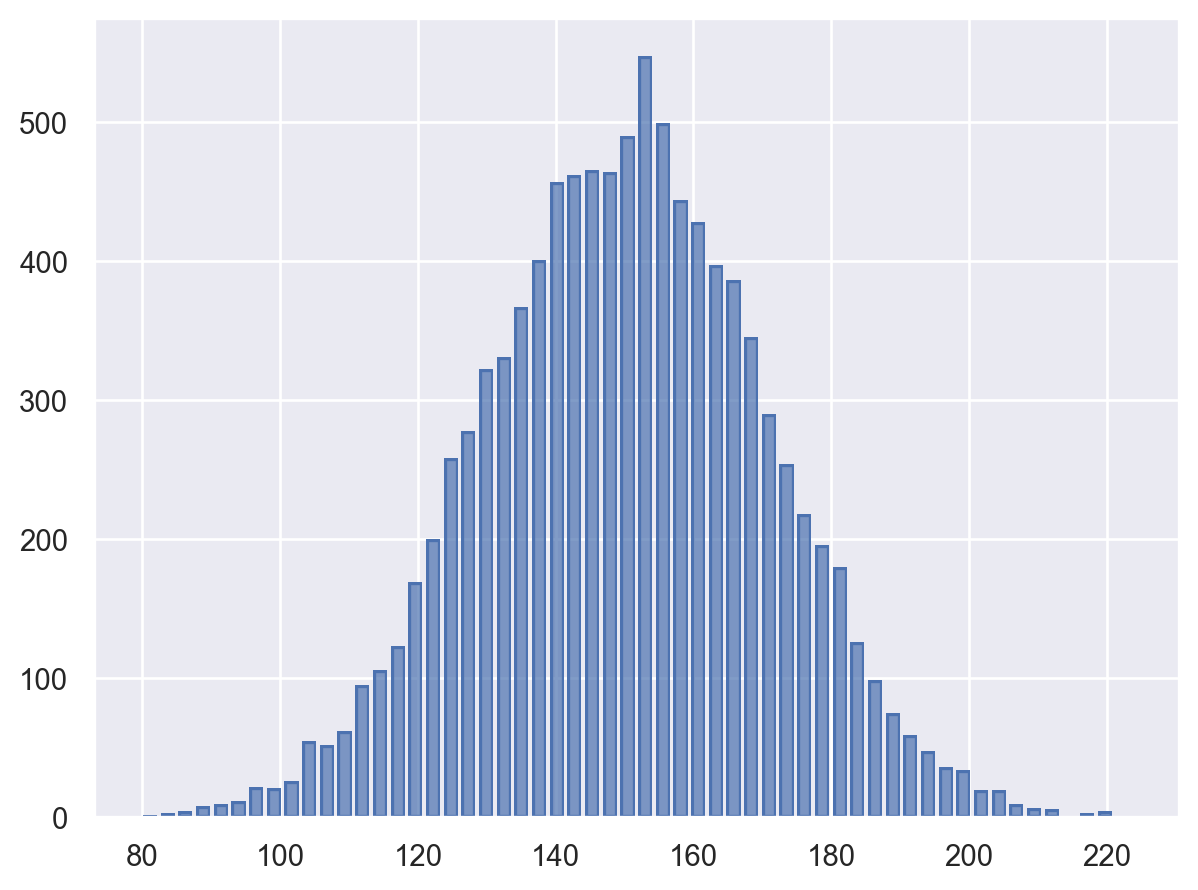

In [16]:
(
    so.Plot(heights)
    .add(so.Bar(), so.Hist())
)

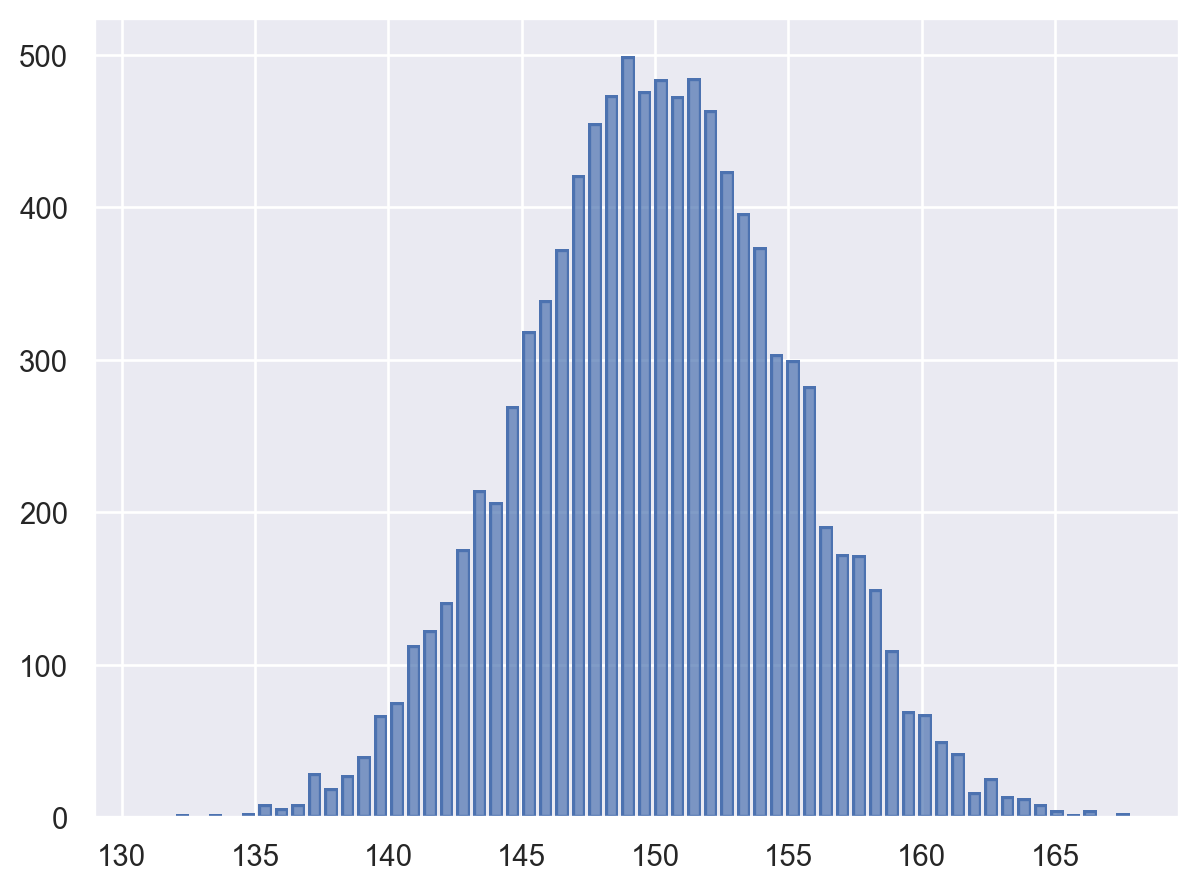

In [17]:
(
    so.Plot(mu_prior)
    .add(so.Bar(), so.Hist())
)

Change the mean of the parameter distribution to 100 cm and see what happens. Do the same for the standard deviation of the parameter distribution.

In [18]:
mu_prior = stats.norm(loc=200, scale=25).rvs(10_000)
new_heights = stats.norm(loc=mu_prior, scale=20).rvs(10_000)

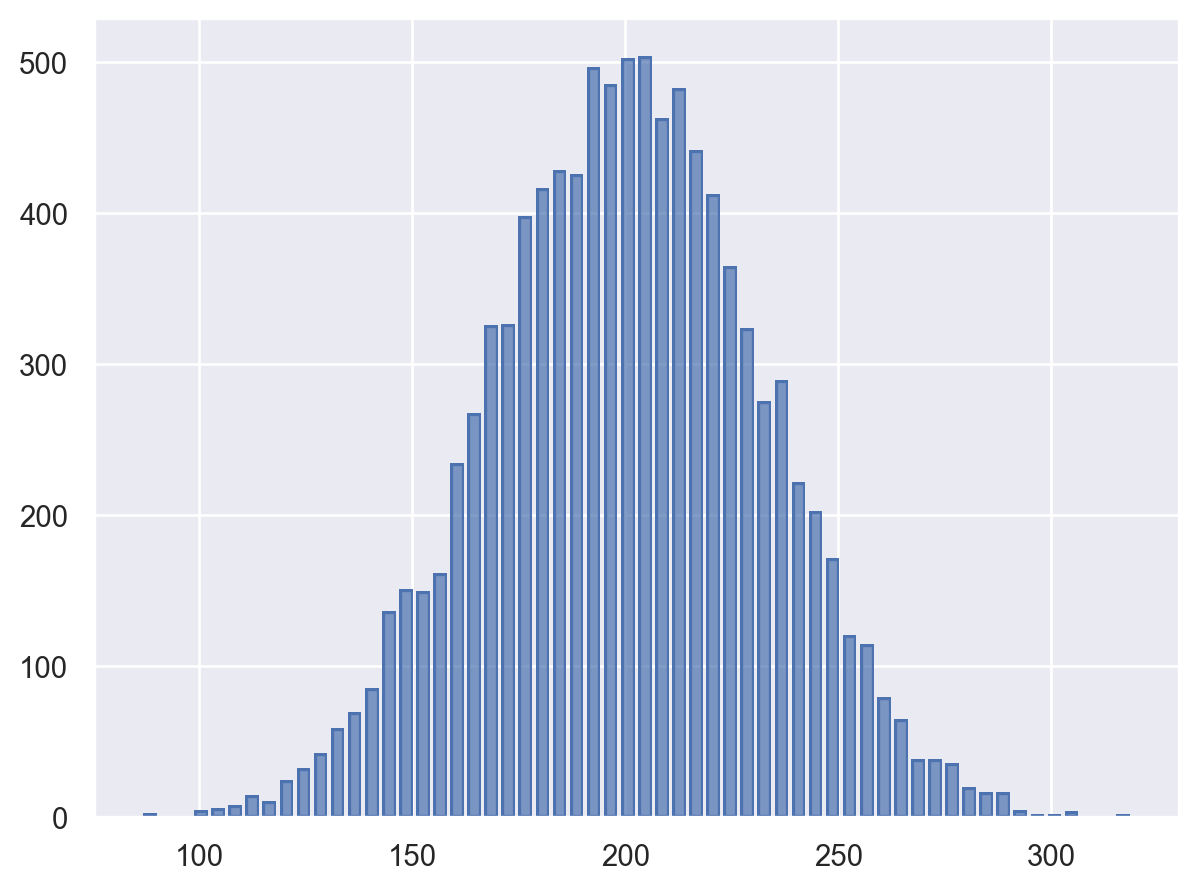

In [19]:
(
    so.Plot(new_heights)
    .add(so.Bar(), so.Hist())
)

1. Specify a Normal distribution but this time
    * The mean is specified by another Normal distribution of `N(150, 5)`.
    * The standard deviation is a HalfNormal with standard deviation 15.

Take 10,000 samples and plot all three distributions. Write down conceptually why we are using a HalfNormal for standard deviation instead of a full normal.

In [20]:
mu_prior = stats.norm(loc=150, scale=5).rvs(10_000)
sigma_prior = stats.halfnorm(scale=15).rvs(10_000)
heights = stats.norm(loc=mu_prior, scale=sigma_prior).rvs(10_000)

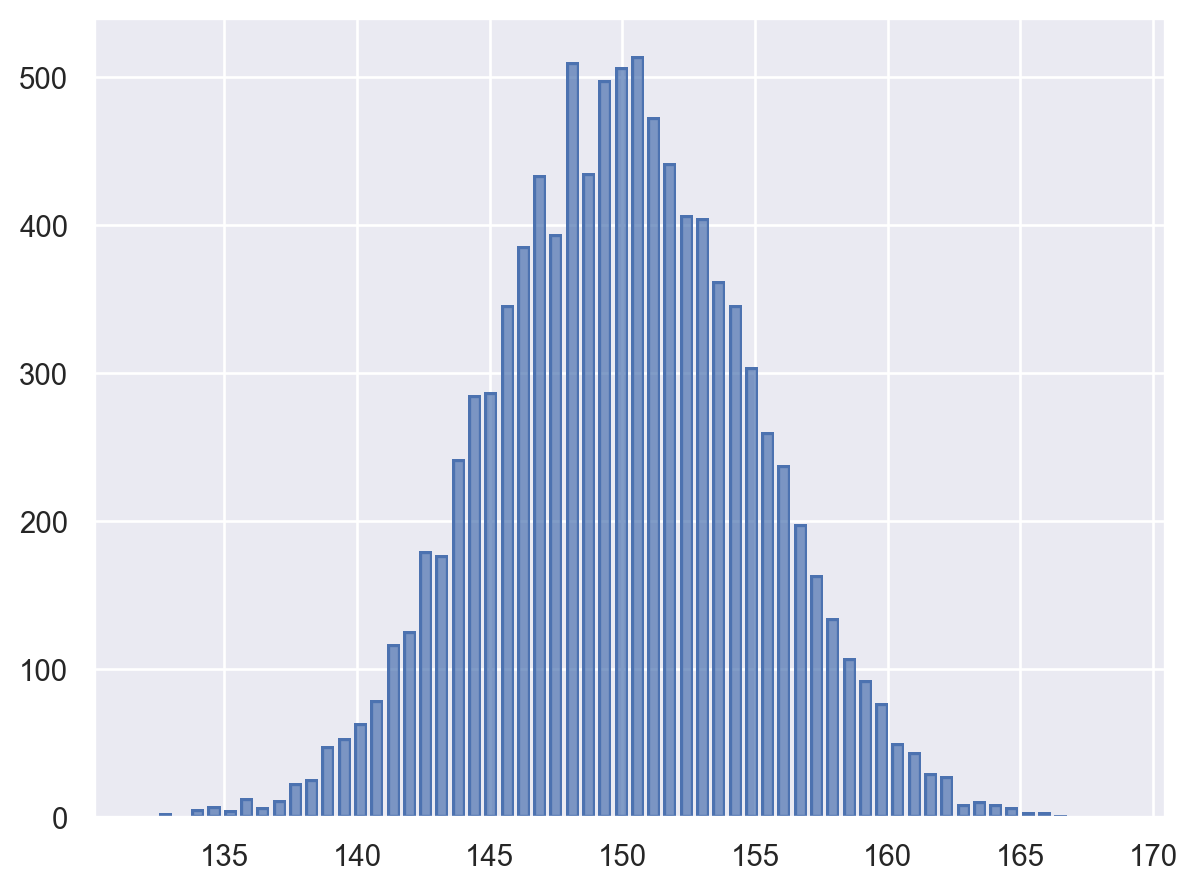

In [21]:
(
    so.Plot(mu_prior)
    .add(so.Bar(), so.Hist())
)

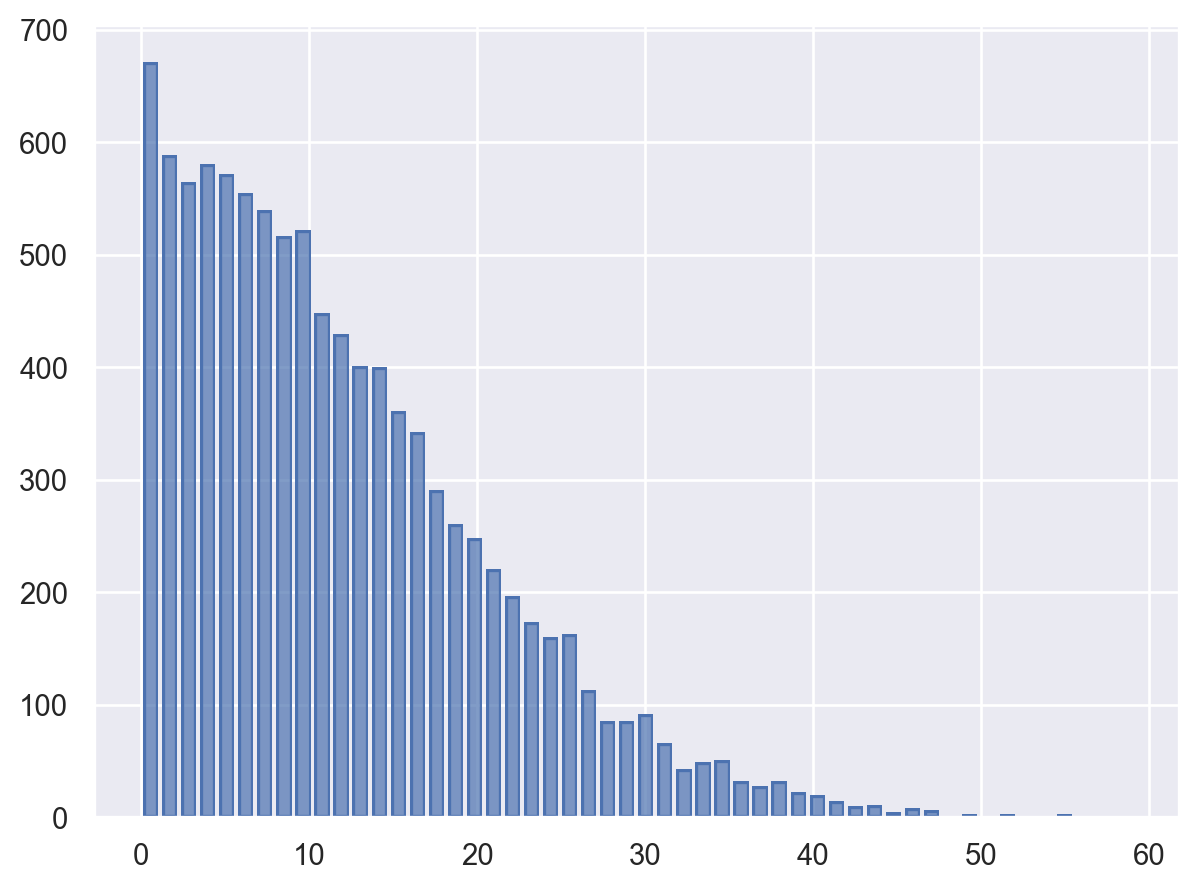

In [22]:
(
    so.Plot(sigma_prior)
    .add(so.Bar(), so.Hist())
)

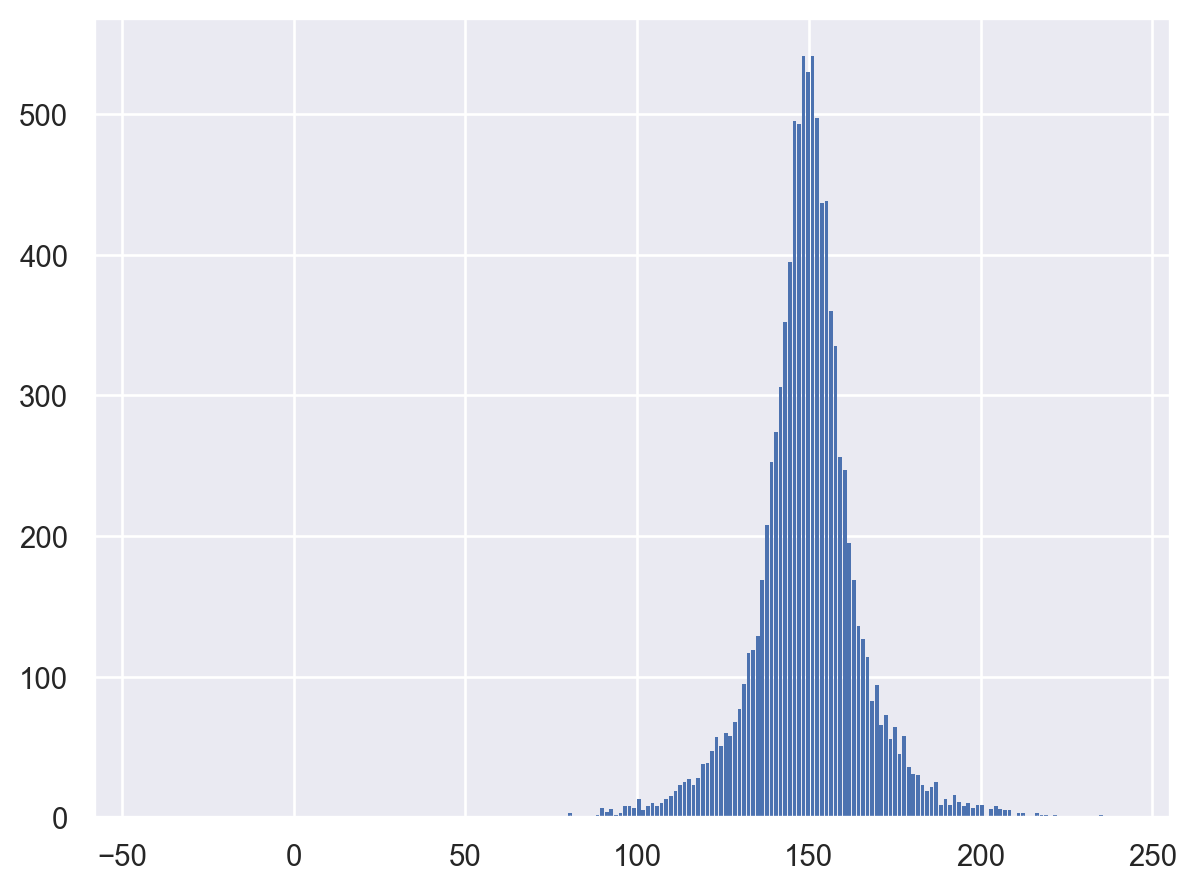

In [23]:
(
    so.Plot(heights)
    .add(so.Bar(), so.Hist())
)

We're using a HalfNormal for standard deviation instead of a full normal since $\sigma >= 0$. If we were to use a full normal, we'd get an error:

In [25]:
normal_sigma = stats.norm(loc=0, scale=1).rvs(10_000)
wrong_heights = stats.norm(loc=mu_prior, scale=normal_sigma).rvs(10_000)

ValueError: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.norm` documentation for details.